<a href="https://colab.research.google.com/github/mannmoshe/machine-learning/blob/main/FinalProject/ConstructionPlans_withNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - Construction plans<br>*By Moshe Mann*

**Overview**<br>
The Israel Planning Administration (IPA) is handling detailed construction plans.<BR>Every detailed plan contains a lot of data, among the rest, division of main and service area.<BR><BR>Main area is the area that divided among the tenants, like the departments,<BR> and the service area is common to all tenants, like parking, stairwell etc.<BR><BR>
In the near future the plans will not include the division between main and service area, because it is not important for the IPA as planning unit, but still, it is important data for regulation.<BR><BR> The purpose of the project is to predict the main and service areas based on the cell and plan features, so that the model can be used for regulatory purposes.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/mannmoshe/machine-learning/main/FinalProject/cellsData.csv')
data = data.drop_duplicates(subset="PL_NUMBER", keep="first")

In [4]:
data.shape

(2582, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2582 entries, 0 to 13708
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PL_NUMBER                2582 non-null   object 
 1   PL_AREA                  2582 non-null   object 
 2   LANDUSE                  2582 non-null   object 
 3   MAIN_AREA                2582 non-null   float64
 4   SERVICE_AREA             2582 non-null   float64
 5   CELL_SIZE_TOTAL          2582 non-null   float64
 6   CELL_SIZE_MIN            2582 non-null   float64
 7   CELL_SIZE_MAX            2582 non-null   float64
 8   HOUSING_UNITS            2582 non-null   float64
 9   BUILDING_HEIGHT          2582 non-null   float64
 10  FLOORS_NUM               2582 non-null   float64
 11  TOTAL_AREA               2582 non-null   float64
 12  AUTHORITY                2582 non-null   object 
 13  DISTRICT                 2582 non-null   object 
 14  SECTOR_GROUP           

### Features

<table>
  <tbody>    
    <tr valign="top">
      <td valign="top">
        <ul>
          <li>PL_NUMBER : Number of plan</li>
          <br>
          <li>PL_AREA: Number of plan concatenate to number of area-cell</li>
          <br>          
          <li>LANDUSE: Usage of land</li>
          <br>
          <li>MAIN_AREA: Area divided among the tentants (square meter)<br>This is the dependent variable that need to be predicted!</li>
          <br>
          <li>SERVICE_AREA: Common area of all the tentants (square meter)</li>
          <br>
          <li>CELL_SIZE_TOTAL: The size of area-cell</li>
          <br>
          <li>CELL_SIZE_MIN: The minimum size of area-cell</li>
          <br>
          <li>CELL_SIZE_MAX: The maximum size of area-cell</li>
          <br>
          <li>HOUSING_UNITS: Number of housing units</li>
          <br>
          <li>BUILDING_HEIGHT: Height of building (meter)</li>
          <br>
          <li>FLOORS_NUM: Number of floors</li>
          <br>
          <li>TOTAL_AREA: Sum of Main area and Service area</li>
          <br>
          <li>AUTHORITY: Authority of plan</li>
          <br>
          <li>DISTRICT: District of plan</li>
          <br>
          <li>SECTOR_GROUP: Sector of plan</li>
          <br>
          <li>CONFIRMATION_YEAR: Year of plan's confirmation</li>
          <br>
          <li>CONSTRUCTION_TYPE_GROUP: Type of construction</li>          
        </ul>
      </td>
    </tr>
    
  </tbody>
</table>

In [6]:
data.head()

,PL_NUMBER,PL_AREA,LANDUSE,MAIN_AREA,SERVICE_AREA,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX,HOUSING_UNITS,BUILDING_HEIGHT,FLOORS_NUM,TOTAL_AREA,AUTHORITY,DISTRICT,SECTOR_GROUP,CONFIRMATION_YEAR,CONSTRUCTION_TYPE_GROUP
0,610-0197038,610-0197038-102,מגורים,975.0,300.0,2466.0,0.0,0.0,16.0,11.0,2.0,1275.0,מחוזית,דרום,חברה כללית / מעורבת,2017,חדשה
2,151-0392894,151-0392894-210,מגורים,960.0,180.0,2820.0,0.0,0.0,6.0,17.0,4.0,1140.0,מחוזית,ירושלים,חברה כללית / מעורבת,2017,התחדשות
73,תמל/ 1049,תמל/ 1049-123,מגורים,152.0,48.0,420.0,0.0,0.0,1.0,0.0,2.0,200.0,ארצית,מרכז,חברה כללית / מעורבת,2019,חדשה
297,553-0198077,553-0198077-201,מגורים,2090.0,1045.0,1496.0,0.0,0.0,19.0,25.5,6.0,3135.0,מחוזית,תל-אביב,חברה כללית / מעורבת,2017,חדשה
322,תמל/ 1029,תמל/ 1029-215,מגורים,675.0,225.0,563.0,0.0,0.0,4.0,21.0,4.0,900.0,ארצית,צפון,חברה ערבית,2018,חדשה


In [7]:
data['PL_NUMBER'].str.contains('תמל').sum()

60

In [8]:
data['IS_TAMAL'] = data['PL_NUMBER'].apply(lambda x: 1 if 'תמל' in x else 0)
data['IS_TAMAL'].value_counts()

0    2522
1      60
Name: IS_TAMAL, dtype: int64

In [9]:
data['LANDUSE'].value_counts()

מגורים                                2444
מגורים ומסחר                            66
מגורים מסחר ותעסוקה                     36
מגורים ומבנים ומוסדות ציבור              6
מגורים מסחר ותיירות                      6
מגורים מסחר ומבנים ומוסדות ציבור         5
מגורים תעסוקה ותיירות                    5
מגורים ודיור מיוחד                       3
תתתת מגורים ב                            2
מגורים מסחר ותחבורה                      2
מגורים ותיירות                           2
מגורים ומשרדים                           2
מגורים ואירוח כפרי                       1
מגורים ותחבורה                           1
מגורים תיירות ומבנים ומוסדות ציבור       1
Name: LANDUSE, dtype: int64

In [10]:
data['LANDUSE'] = data['LANDUSE'].mask(data['LANDUSE'] != 'מגורים', 'מגורים משולב')

In [11]:
data['LANDUSE'].value_counts()

מגורים          2444
מגורים משולב     138
Name: LANDUSE, dtype: int64

Now let's explore the Main & Service columns.

The outliers are probably mistakes. let's see the distribution:

Those columns ['CELL_SIZE_TOTAL', 'CELL_SIZE_MIN',
       'CELL_SIZE_MAX'] describe the cell size.

In [13]:
data[['CELL_SIZE_TOTAL', 'CELL_SIZE_MIN', 'CELL_SIZE_MAX']].describe()

,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX
count,2582.000000,2582.000000,2582.000000
mean,1090.196193,168.493582,8.830287
std,2387.854179,954.531702,149.623238
min,0.000000,0.000000,0.000000
25%,386.250000,0.000000,0.000000
50%,659.500000,0.000000,0.000000
75%,1020.750000,0.000000,0.000000
max,63924.000000,32000.000000,5690.000000


HOUSING_UNITS shold not be zero.

In [14]:
data['HOUSING_UNITS'].value_counts().sort_index()

0.0        79
1.0       353
2.0       225
3.0       162
4.0       393
         ... 
471.0       1
524.0       1
564.0       1
613.0       1
1200.0      1
Name: HOUSING_UNITS, Length: 147, dtype: int64

In [15]:
data['HOUSING_UNITS'] = data['HOUSING_UNITS'].mask(data['HOUSING_UNITS'] == 0, data['FLOORS_NUM']*2)

In [16]:
data['HOUSING_UNITS'].value_counts().sort_index()

0.0         2
1.0       353
2.0       227
3.0       162
4.0       406
         ... 
471.0       1
524.0       1
564.0       1
613.0       1
1200.0      1
Name: HOUSING_UNITS, Length: 147, dtype: int64

In [17]:
data = data[data['HOUSING_UNITS'] > 0]
data.shape 

(2580, 18)

In [18]:
data['BUILDING_HEIGHT'].value_counts()[:11]

0.00     249
12.00    246
8.50     178
15.00    162
9.00     125
12.50     67
14.00     57
12.48     53
18.00     50
16.00     44
10.00     43
13.00     43
8.00      42
9.50      38
7.50      38
7.00      34
15.60     31
11.00     31
Name: BUILDING_HEIGHT, dtype: int64

A lot of missing data, BUILDING_HEIGHT should not be zero.<br>
I will replace it with the mean of BUILDING_HEIGHT with correct values (greather than 0).

In [19]:
building_height_avg = round(data[data['BUILDING_HEIGHT'] > 0]['BUILDING_HEIGHT'].mean())
building_height_avg

16

In [20]:
data['BUILDING_HEIGHT'] = data['BUILDING_HEIGHT'].mask(data['BUILDING_HEIGHT']==0, building_height_avg)
data['BUILDING_HEIGHT'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


16.00    293
12.00    246
8.50     178
15.00    162
9.00     125
        ... 
85.67      1
13.03      1
23.65      1
85.90      1
9.24       1
Name: BUILDING_HEIGHT, Length: 481, dtype: int64

In [21]:
data['SECTOR_GROUP'].value_counts()

חברה ערבית             1272
חברה כללית / מעורבת    1042
חברה חרדית              207
(חסר)                    59
Name: SECTOR_GROUP, dtype: int64

In [22]:
data['SECTOR_GROUP'] = data['SECTOR_GROUP'].mask(data['SECTOR_GROUP'] == '(חסר)', 'חברה כללית / מעורבת')
data['SECTOR_GROUP'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


חברה ערבית             1272
חברה כללית / מעורבת    1101
חברה חרדית              207
Name: SECTOR_GROUP, dtype: int64

Let's handle null values:

In [23]:
data.isnull().sum()

PL_NUMBER                  0
PL_AREA                    0
LANDUSE                    0
MAIN_AREA                  0
SERVICE_AREA               0
CELL_SIZE_TOTAL            0
CELL_SIZE_MIN              0
CELL_SIZE_MAX              0
HOUSING_UNITS              0
BUILDING_HEIGHT            0
FLOORS_NUM                 0
TOTAL_AREA                 0
AUTHORITY                  0
DISTRICT                   0
SECTOR_GROUP               0
CONFIRMATION_YEAR          0
CONSTRUCTION_TYPE_GROUP    4
IS_TAMAL                   0
dtype: int64

In [24]:
data['CONSTRUCTION_TYPE_GROUP'].value_counts(dropna=False)

חדשה       1525
התחדשות     921
הסדרה       130
NaN           4
Name: CONSTRUCTION_TYPE_GROUP, dtype: int64

https://stackoverflow.com/questions/32617811/imputation-of-missing-values-for-categories-in-pandas

In [25]:
data['CONSTRUCTION_TYPE_GROUP'] = data['CONSTRUCTION_TYPE_GROUP'].fillna(data['CONSTRUCTION_TYPE_GROUP'].mode().iloc[0])
data['CONSTRUCTION_TYPE_GROUP'].value_counts(dropna=False)

חדשה       1529
התחדשות     921
הסדרה       130
Name: CONSTRUCTION_TYPE_GROUP, dtype: int64

In [26]:
data = data.drop(['PL_NUMBER', 'PL_AREA', 'SERVICE_AREA'], axis=1)

Now let's get dummies of the categorical columns so we will be able to bulid a model.

In [27]:
dummies_data = pd.get_dummies(data)
print(dummies_data.shape)
dummies_data.columns = ['MAIN_AREA', 'CELL_SIZE_TOTAL', 'CELL_SIZE_MIN', 'CELL_SIZE_MAX',
       'HOUSING_UNITS', 'BUILDING_HEIGHT', 'FLOORS_NUM', 'TOTAL_AREA',
       'CONFIRMATION_YEAR', 'IS_TAMAL', 'LANDUSE_RESIDENCE',
       'LANDUSE_RESIDENCE_MIXED', 'AUTHORITY_COUNTRY', 'AUTHORITY_DISTRICT',
       'DISTRICT_SOUTH', 'DISTRICT_HAIFA', 'DISTRICT_JERUSALEM', 'DISTRICT_DAN',
       'DISTRICT_NORTH', 'DISTRICT_TEL_AVIV', 'SECTOR_REL',
       'SECTOR_MIXED', 'SECTOR_ARAB',
       'CONSTRUCTION_TYPE_ARRANGING', 'CONSTRUCTION_TYPE_REGENERATION',
       'CONSTRUCTION_TYPE_NEW']
dummies_data.head()

(2580, 26)


,MAIN_AREA,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX,HOUSING_UNITS,BUILDING_HEIGHT,FLOORS_NUM,TOTAL_AREA,CONFIRMATION_YEAR,IS_TAMAL,LANDUSE_RESIDENCE,LANDUSE_RESIDENCE_MIXED,AUTHORITY_COUNTRY,AUTHORITY_DISTRICT,DISTRICT_SOUTH,DISTRICT_HAIFA,DISTRICT_JERUSALEM,DISTRICT_DAN,DISTRICT_NORTH,DISTRICT_TEL_AVIV,SECTOR_REL,SECTOR_MIXED,SECTOR_ARAB,CONSTRUCTION_TYPE_ARRANGING,CONSTRUCTION_TYPE_REGENERATION,CONSTRUCTION_TYPE_NEW
0,975.0,2466.0,0.0,0.0,16.0,11.0,2.0,1275.0,2017,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
2,960.0,2820.0,0.0,0.0,6.0,17.0,4.0,1140.0,2017,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
73,152.0,420.0,0.0,0.0,1.0,16.0,2.0,200.0,2019,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
297,2090.0,1496.0,0.0,0.0,19.0,25.5,6.0,3135.0,2017,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
322,675.0,563.0,0.0,0.0,4.0,21.0,4.0,900.0,2018,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1


In [28]:
corr = dummies_data.corr()
print(corr.loc['MAIN_AREA'].sort_values(ascending=False))

MAIN_AREA                         1.000000
TOTAL_AREA                        0.996335
HOUSING_UNITS                     0.834821
FLOORS_NUM                        0.658868
CELL_SIZE_TOTAL                   0.609265
BUILDING_HEIGHT                   0.587021
DISTRICT_TEL_AVIV                 0.279853
IS_TAMAL                          0.185409
AUTHORITY_COUNTRY                 0.185409
SECTOR_MIXED                      0.184196
CONSTRUCTION_TYPE_REGENERATION    0.096998
LANDUSE_RESIDENCE_MIXED           0.083635
DISTRICT_DAN                      0.054586
CELL_SIZE_MIN                     0.041367
DISTRICT_HAIFA                    0.036823
CELL_SIZE_MAX                     0.014051
DISTRICT_SOUTH                   -0.003237
SECTOR_REL                       -0.025171
CONFIRMATION_YEAR                -0.032031
CONSTRUCTION_TYPE_ARRANGING      -0.045942
DISTRICT_JERUSALEM               -0.052744
CONSTRUCTION_TYPE_NEW            -0.074129
LANDUSE_RESIDENCE                -0.083635
DISTRICT_NO

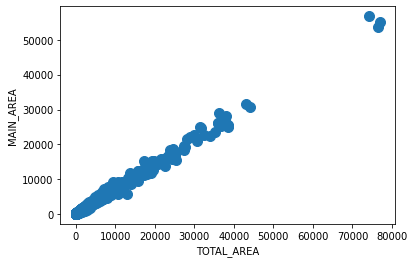

In [29]:
dummies_data.plot.scatter(x = 'TOTAL_AREA', y = 'MAIN_AREA', s = 100)

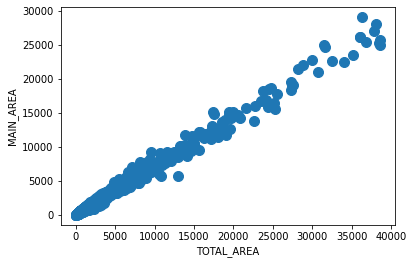

In [106]:
dummies_data = dummies_data[dummies_data['TOTAL_AREA'] < 40000]
dummies_data.plot.scatter(x = 'TOTAL_AREA', y = 'MAIN_AREA', s = 100)

In [107]:
feature_cols = ['TOTAL_AREA'] #['TOTAL_AREA', 'FLOORS_NUM', 'BUILDING_HEIGHT', 'CELL_SIZE_TOTAL', 'HOUSING_UNITS'] 

In [108]:
X = dummies_data[feature_cols]
y = dummies_data['MAIN_AREA']

In [109]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# # transform data
# X_scaled = scaler.fit_transform(X)

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [111]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
# find best n_neighbors

params = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23,25], 'weights':['uniform', 'distance']}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 15, 'weights': 'distance'}

In [112]:
neigh = KNeighborsRegressor(n_neighbors=15, weights='distance')
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15, weights='distance')

In [113]:
y_pred = neigh.predict(X_test)

In [114]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)
rsquared = r2_score(y_test, y_pred)
print("R Squared:", rsquared)

MAE: 149.55219208940753
MSE: 122649.60587307863
RMSE: 350.2136574622392
R Squared: 0.9869479362725436


https://stackoverflow.com/questions/40729162/merging-results-from-model-predict-with-original-pandas-dataframe

In [115]:
result_df = pd.DataFrame(y_test)
result_df['y_pred'] = y_pred
result_df.T

,12677,12077,9296,12692,11043,11294,4786,12721,13301,13706,13520,11454,13277,11477,12713,11744,12436,9948,12602,12761,11879,11035,11689,12026,11543,13284,1571,1417,12638,13610,13529,13421,9043,11005,13542,11614,13003,13530,1336,13493,...,11663,12196,13598,12073,6517,12045,12778,11412,11698,13554,11958,5172,11776,13345,11804,7057,4577,5879,12161,12000,441,12999,5415,5385,7488,1830,12604,1947,13397,13260,12757,12364,13461,12237,1905,11832,11257,13201,12691,13536
MAIN_AREA,1580.000000,275.000000,200.000000,952.0,355.0,75.000000,809.050000,720.0,203.010000,1211.750000,200.00,130.0,596.500000,250.0,396.000000,850.000000,3000.0,640.000000,480.000000,220.0,4352.000000,2460.000000,916.000000,262.0,5130.000000,701.4,123.600000,859.0,350.0,1107.000000,776.000000,472.500000,761.000000,467.28,450.000000,360.0,790.000000,1190.000000,860.000000,1061.000000,...,2336.000000,700.0,750.0,893.000000,90.000000,180.0,1548.030000,1344.000000,875.0,192.0,1903.000000,160.000000,568.000000,730.300000,1525.000000,670.0,1281.000000,870.000000,557.000000,490.0,3476.000000,383.000000,720.0,11875.000000,840.000000,240.0,283.0,360.000,533.000000,7125.000000,990.000000,890.000000,570.000000,399.000000,457.0,19100.000000,475.00000,868.220000,890.500000,270.0
y_pred,1638.283819,265.571429,199.369458,1010.0,285.0,89.357078,884.105023,751.8,175.316243,1274.213701,205.25,156.0,543.543257,246.8,375.333333,887.733333,2915.0,692.888889,499.666667,212.0,4883.968123,3294.030025,905.145878,283.0,4859.952531,698.5,136.933501,849.0,345.0,1301.849829,696.351513,402.902643,760.127899,496.10,562.918352,385.0,771.772311,1414.844986,887.733333,1031.684546,...,2035.183312,556.0,800.0,914.258038,134.375517,180.0,1653.837073,1516.477383,777.5,221.0,2371.374929,159.121672,538.666667,903.523062,1730.711936,757.0,1274.275641,938.940979,597.074009,512.0,4553.319911,357.516111,970.0,11932.468314,810.666667,246.8,246.8,334.375,466.772306,5114.103058,983.119223,1146.591923,569.727273,385.037437,468.5,18830.085928,463.88894,755.947408,828.984346,325.0


In [116]:
all_data_with_predictions = pd.merge(data, result_df, left_index=True, right_index=True)
all_data_with_predictions.head()

,LANDUSE,MAIN_AREA_x,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX,HOUSING_UNITS,BUILDING_HEIGHT,FLOORS_NUM,TOTAL_AREA,AUTHORITY,DISTRICT,SECTOR_GROUP,CONFIRMATION_YEAR,CONSTRUCTION_TYPE_GROUP,IS_TAMAL,MAIN_AREA_y,y_pred
441,מגורים,3476.0,3650.00,0.0,0.0,38.0,18.0,5.0,5670.0,מחוזית,חיפה,חברה כללית / מעורבת,2017,התחדשות,0,3476.0,4553.319911
715,מגורים,948.0,1028.00,0.0,0.0,4.0,10.5,2.0,1028.0,מחוזית,דרום,חברה ערבית,2018,חדשה,0,948.0,859.046203
806,מגורים,1605.0,749.00,0.0,0.0,18.0,18.7,6.0,1866.0,מחוזית,ירושלים,חברה ערבית,2017,התחדשות,0,1605.0,1491.692307
996,מגורים,310.0,999.94,0.0,0.0,1.0,7.0,2.0,370.0,מחוזית,מרכז,חברה כללית / מעורבת,2019,חדשה,0,310.0,270.000000
1061,מגורים,310.0,600.00,0.0,0.0,2.0,8.0,2.0,400.0,מחוזית,צפון,חברה כללית / מעורבת,2017,חדשה,0,310.0,309.714286


In [117]:
from google.colab import files
# all_data_with_predictions.to_csv('all_data_with_predictions.csv', encoding='utf-8-sig')
# files.download("all_data_with_predictions.csv")

In [134]:
new_data = pd.read_csv('https://raw.githubusercontent.com/mannmoshe/machine-learning/main/FinalProject/cellsData_New.csv')
#new_data = new_data.drop_duplicates(subset="PL_NUMBER", keep="first")
new_data = new_data[new_data['TOTAL_AREA'] < 40000]
new_data.shape

(359, 17)

In [135]:
X_new = new_data[feature_cols]
# X_new_scaled = scaler.fit_transform(X_new)
y_new = new_data['MAIN_AREA']

In [136]:
y_new_pred = neigh.predict(X_new)

In [137]:
mae = mean_absolute_error(y_new, y_new_pred)
print("MAE:", mae)
mse = mean_squared_error(y_new, y_new_pred)
print("MSE:", mse)
rmse = mean_squared_error(y_new, y_new_pred, squared=False)
print("RMSE:", rmse)
rsquared = r2_score(y_new, y_new_pred)
print("R Squared:", rsquared)

MAE: 218.72816344680456
MSE: 134402.6351713456
RMSE: 366.60964958842203
R Squared: 0.9737304053500706


In [138]:
new_result_df = pd.DataFrame(y_new)
new_result_df['y_pred'] = y_new_pred
print(new_result_df.shape)
new_result_df.T

(359, 2)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358
MAIN_AREA,576.0,220.0,240.0,570.400000,768.800000,620.0,590.240000,728.000000,3250.000000,15155.000000,8155.000000,19810.000000,12985.00000,15045.000000,14015.000000,13555.000000,14965.000000,18275.000000,953.000000,575.0,647.000,618.0,653.000000,645.000000,659.00000,686.0,670.000000,651.000000,640.000000,620.00000,624.0,647.000,647.000,672.000000,1610.000000,945.000000,601.000000,1015.000000,1032.0000,1040.000000,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,324.000000,324.000000,324.000000,324.000000,324.000000,1894.0000,220.0,205.000000,160.0,285.000000,190.000000,240.0,576.0,3060.000000,600.000000,897.0,332.400000,4400.000000,230.00,460.0,1456.00000,230.0,370.000000,383.140000,240.0,480.000000,527.050000,810.600000,811.0,920.0,3034.000000
y_pred,576.8,230.0,246.8,551.822287,730.580274,595.0,558.887134,686.357143,3358.802078,15772.550068,8564.061464,19962.697228,12967.59193,15626.025226,14516.864137,13770.247267,15603.645101,18484.665472,1143.339297,777.5,928.685,903.0,804.565962,910.154797,874.02346,819.0,886.333333,825.465309,887.733333,866.57257,918.0,928.685,928.685,881.339454,2177.050269,1215.545586,811.327694,1328.755567,1267.1068,1441.886046,...,692.888889,692.888889,692.888889,692.888889,692.888889,692.888889,692.888889,692.888889,692.888889,338.305085,338.305085,338.305085,338.305085,338.305085,1872.4103,220.0,211.454739,175.5,302.044524,257.785926,246.8,576.8,2477.551703,582.429969,767.0,340.616592,4379.226293,196.75,450.0,1405.35074,220.0,387.712764,385.862118,246.8,538.666667,639.757538,810.509426,781.5,971.5,2706.828496


In [139]:
all_new_data_with_predictions = pd.merge(new_data, new_result_df, left_index=True, right_index=True)
all_new_data_with_predictions.head()

,PL_NUMBER,PL_AREA,LANDUSE,MAIN_AREA_x,SERVICE_AREA,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX,HOUSING_UNITS,BUILDING_HEIGHT,FLOORS_NUM,TOTAL_AREA,AUTHORITY,DISTRICT,SECTOR_GROUP,CONFIRMATION_YEAR,CONSTRUCTION_TYPE_GROUP,MAIN_AREA_y,y_pred
0,257-0744540,257-0744540-1,מגורים,576.0,96.0,400.0,0,0,0,12.5,4,672.0,מחוזית,צפון,חברה ערבית,2021,חדשה,576.0,576.800000
1,633-0921650,633-0921650-13,מגורים,220.0,60.0,500.0,0,0,1,10.5,2,280.0,מחוזית,דרום,חברה כללית / מעורבת,2021,חדשה,220.0,230.000000
2,633-0921650,633-0921650-11,מגורים,240.0,60.0,599.0,0,0,1,10.5,2,300.0,מחוזית,דרום,חברה כללית / מעורבת,2021,חדשה,240.0,246.800000
3,204-0765354,204-0765354-4,מגורים,570.4,92.0,460.0,0,0,4,14.4,4,662.4,מחוזית,צפון,חברה ערבית,2021,חדשה,570.4,551.822287
4,204-0765354,204-0765354-1,מגורים,768.8,124.0,620.0,0,0,4,14.4,4,892.8,מחוזית,צפון,חברה ערבית,2021,חדשה,768.8,730.580274


In [140]:
from google.colab import files
# all_new_data_with_predictions.to_csv('all_new_data_with_predictions.csv', encoding='utf-8-sig')
# files.download("all_new_data_with_predictions.csv")